<a href="https://colab.research.google.com/github/EisaacJC/ComputerVision/blob/main/LeNetModifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

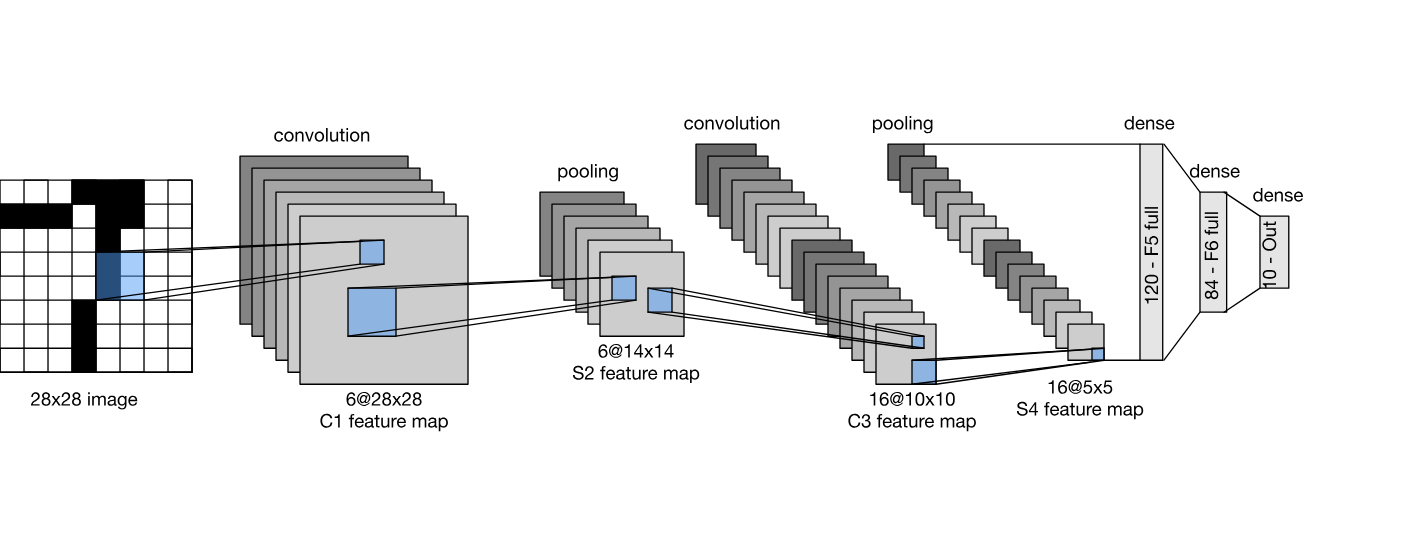

In [ ]:
#Methods/Classes from keras to import
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# LeNet Original Implementation

In [ ]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
(x_train_p,y_train_p), (x_test_p, y_test_p) = mnist.load_data()

* Remember that we used a dataset with 60k images for training and 10k images for testing purposes.

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype("float32")/255
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype("float32")/255

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
def lenet_original():
    inputs = Input(shape=(28, 28, 1))  # Adapted for MNIST, original used 32x32
    # C1: Convolutional layer
    x = Conv2D(6, kernel_size=5, activation="tanh", padding="same", name="C1")(inputs)
    # S2: Subsampling layer
    x = AveragePooling2D(pool_size=(2, 2), strides=2, name="S2")(x)
    # C3: Convolutional layer
    x = Conv2D(16, kernel_size=5, activation="tanh", name="C3")(x)
    # S4: Subsampling layer
    x = AveragePooling2D(pool_size=(2, 2), strides=2, name="S4")(x)
    # C5: Convolutional layer
    x = Conv2D(120, kernel_size=5, activation="tanh", name="C5")(x)
    x = Flatten()(x)
    # F6: Fully connected layer
    x = Dense(84, activation="tanh", name="F6")(x)
    # Output layer
    outputs = Dense(10, activation="softmax", name="output")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model=lenet_original()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (AveragePooling2D)           │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S4 (AveragePooling2D)           │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5 (Conv2D)                     │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F6 (Dense)                      │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train,y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8487 - loss: 0.5202 - val_accuracy: 0.9703 - val_loss: 0.1040
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9661 - loss: 0.1128 - val_accuracy: 0.9792 - val_loss: 0.0695
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9802 - loss: 0.0670 - val_accuracy: 0.9815 - val_loss: 0.0640
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9855 - loss: 0.0500 - val_accuracy: 0.9818 - val_loss: 0.0611
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9864 - loss: 0.0418 - val_accuracy: 0.9875 - val_loss: 0.0500
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9835 - val_loss: 0.0580
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9923 - loss: 0.0264 - val_accuracy: 0.9875 - val_loss: 0.0461
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.

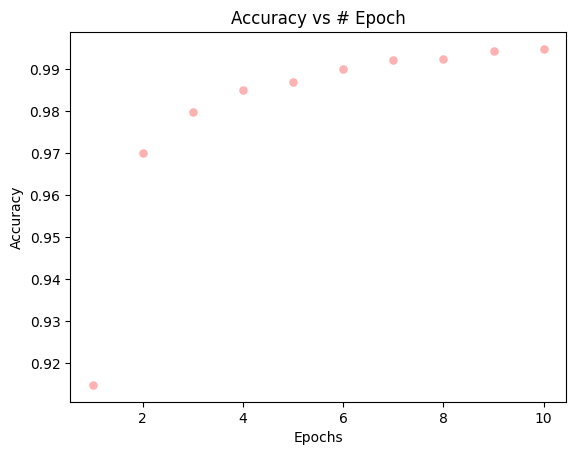

In [ ]:
epochs=np.arange(1,11,1)
plt.scatter(epochs,history.history['accuracy'], c="r", marker="o", linewidth=0.1, alpha=0.3, label="Original")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs # Epoch")
plt.show()

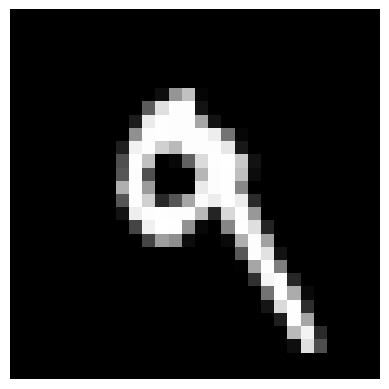

In [ ]:
plt.imshow(x_test_p[7],cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
img=x_test_p[7]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


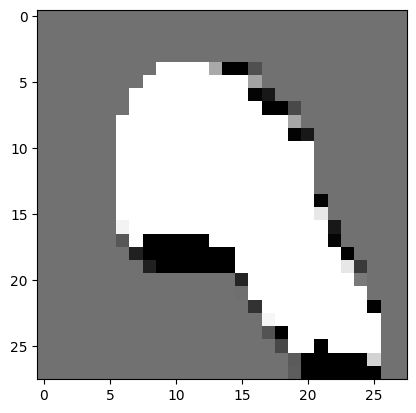

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


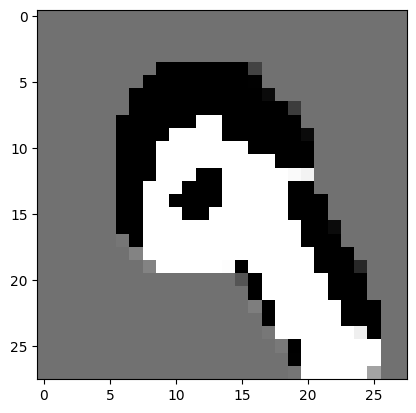

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


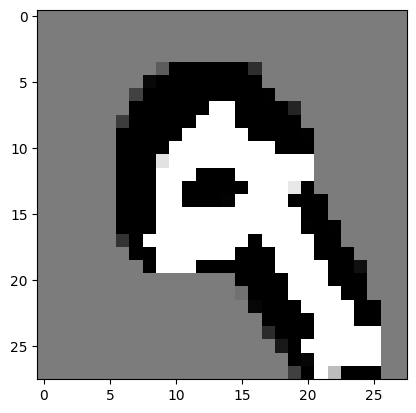

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


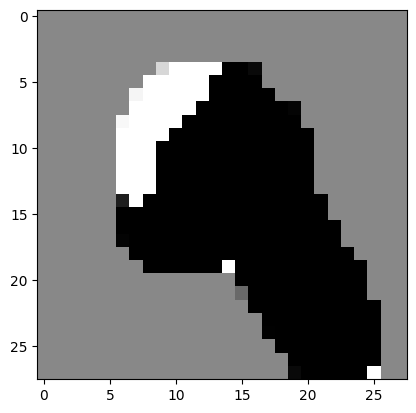

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


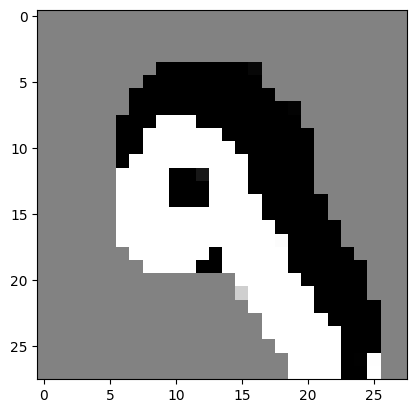

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


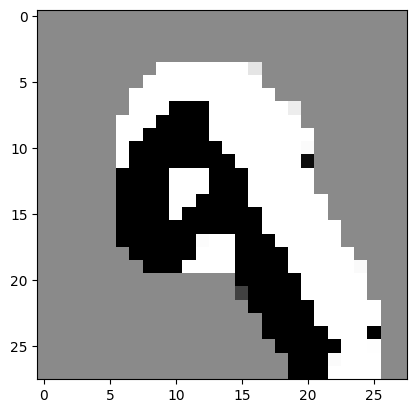

In [ ]:
for i in range(6):
    plt.imshow(Model(inputs=model.input, outputs=model.get_layer("C1").output).predict(img[np.newaxis, :])[0,:,:,i],cmap="gray")
    plt.show()

In [ ]:
def visualization_layer(model, layer_name,img):
    activations=Model(inputs=model.input, outputs=model.get_layer(layer_name).output).predict(img[np.newaxis, :])
    fig, axes=plt.subplots(4,4, figsize=(14,14))
    for i, ax in enumerate(axes.flat):
        if i<activations.shape[-1]:
            ax.imshow(activations[0,:,:,i],cmap="viridis")
            ax.axis("off")
    plt.suptitle(f"Activations on {layer_name}")
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


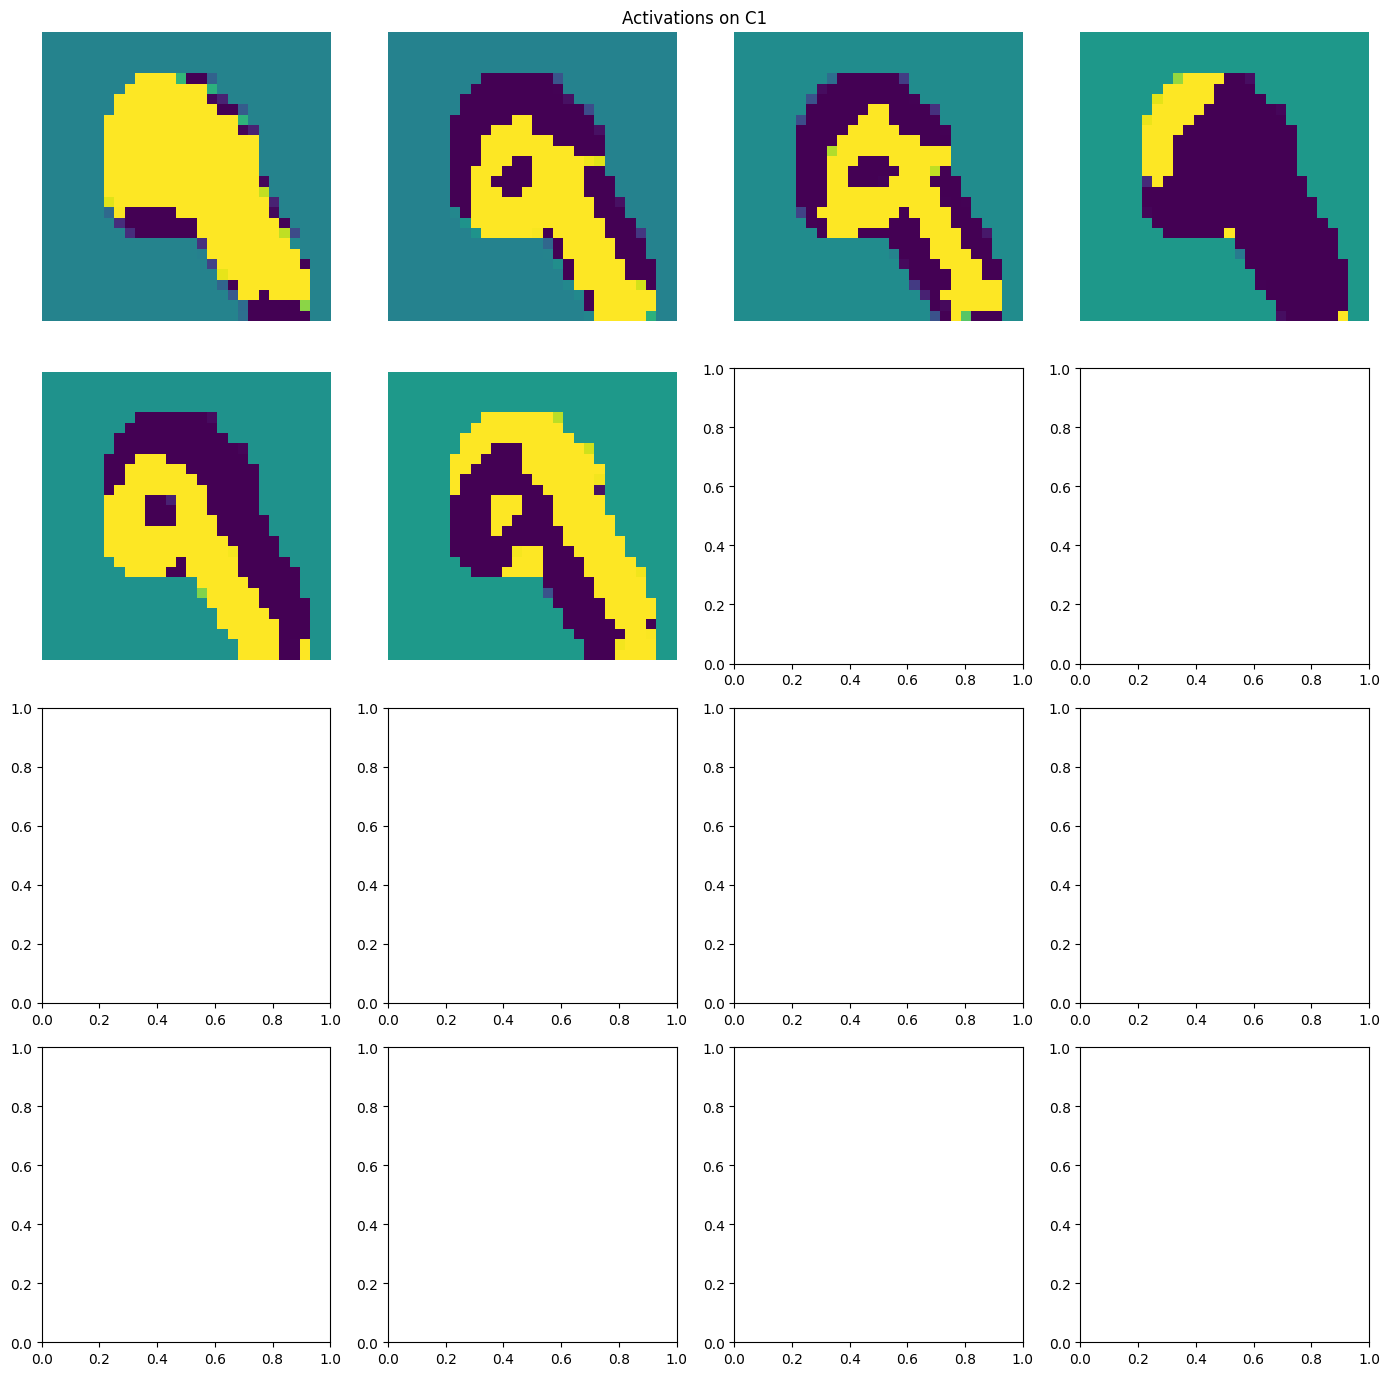

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


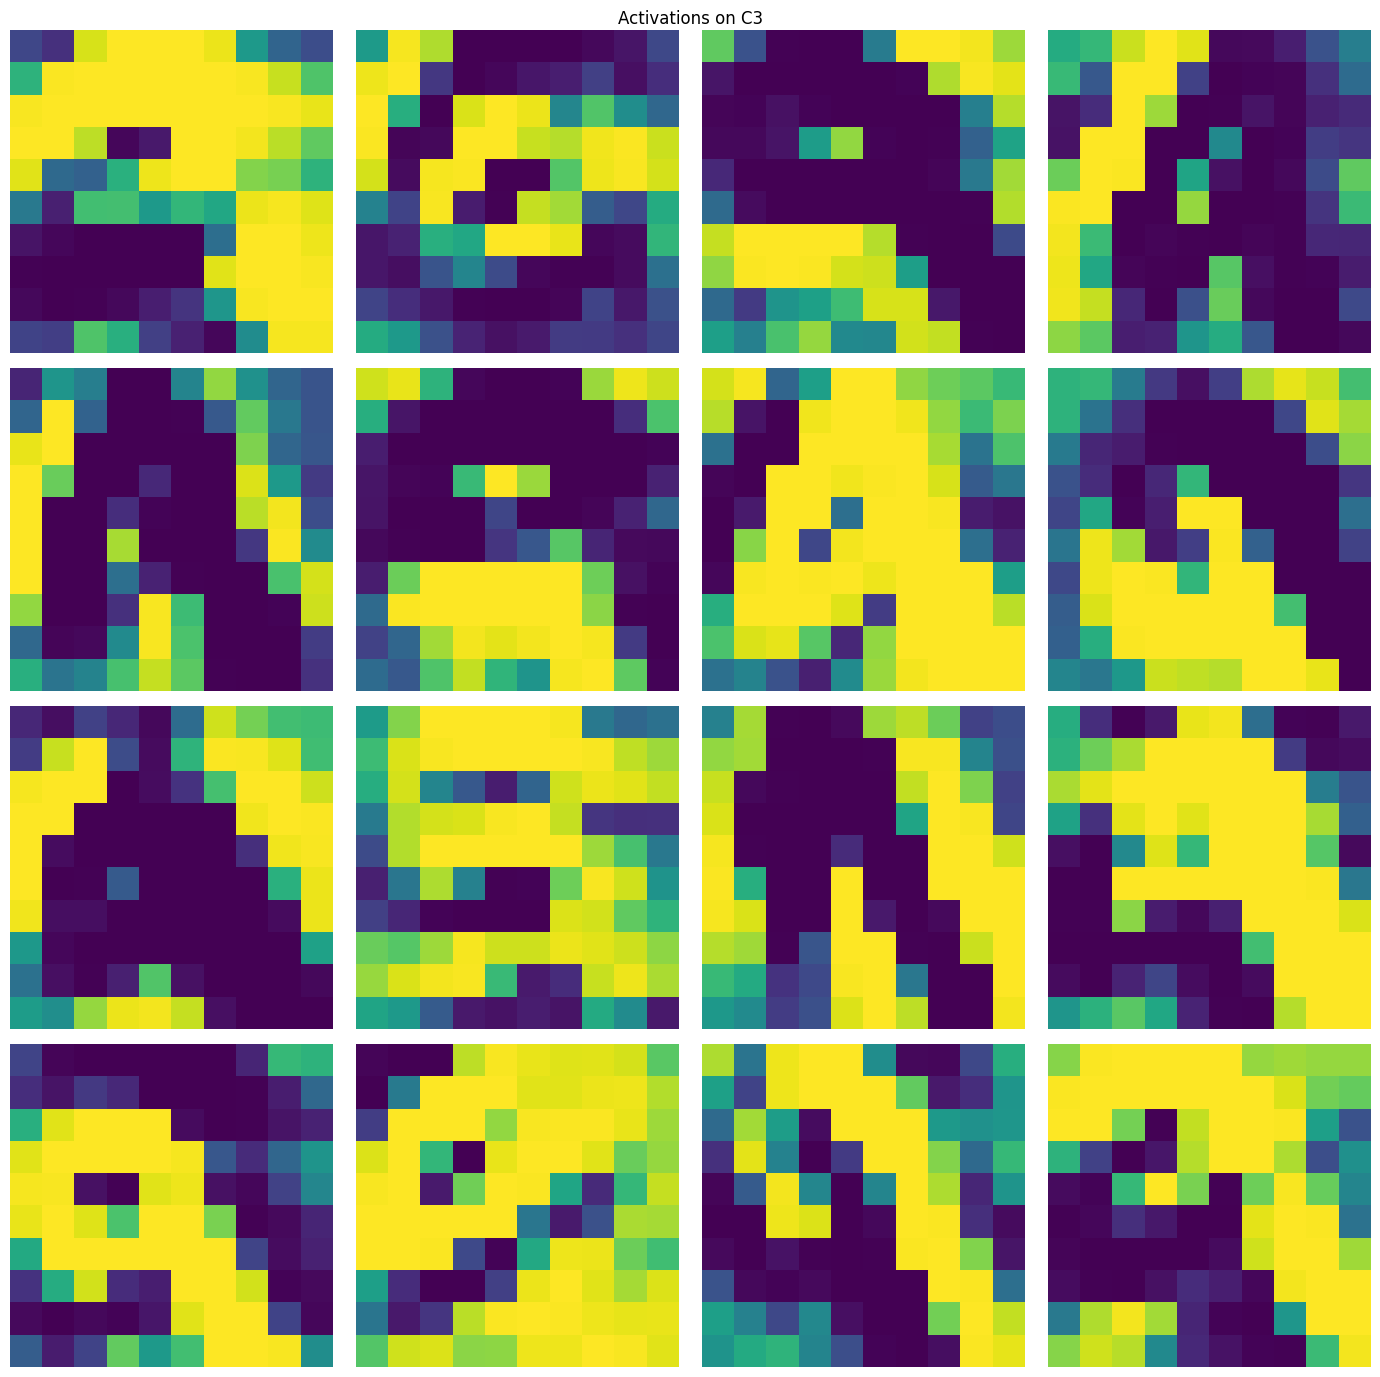

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


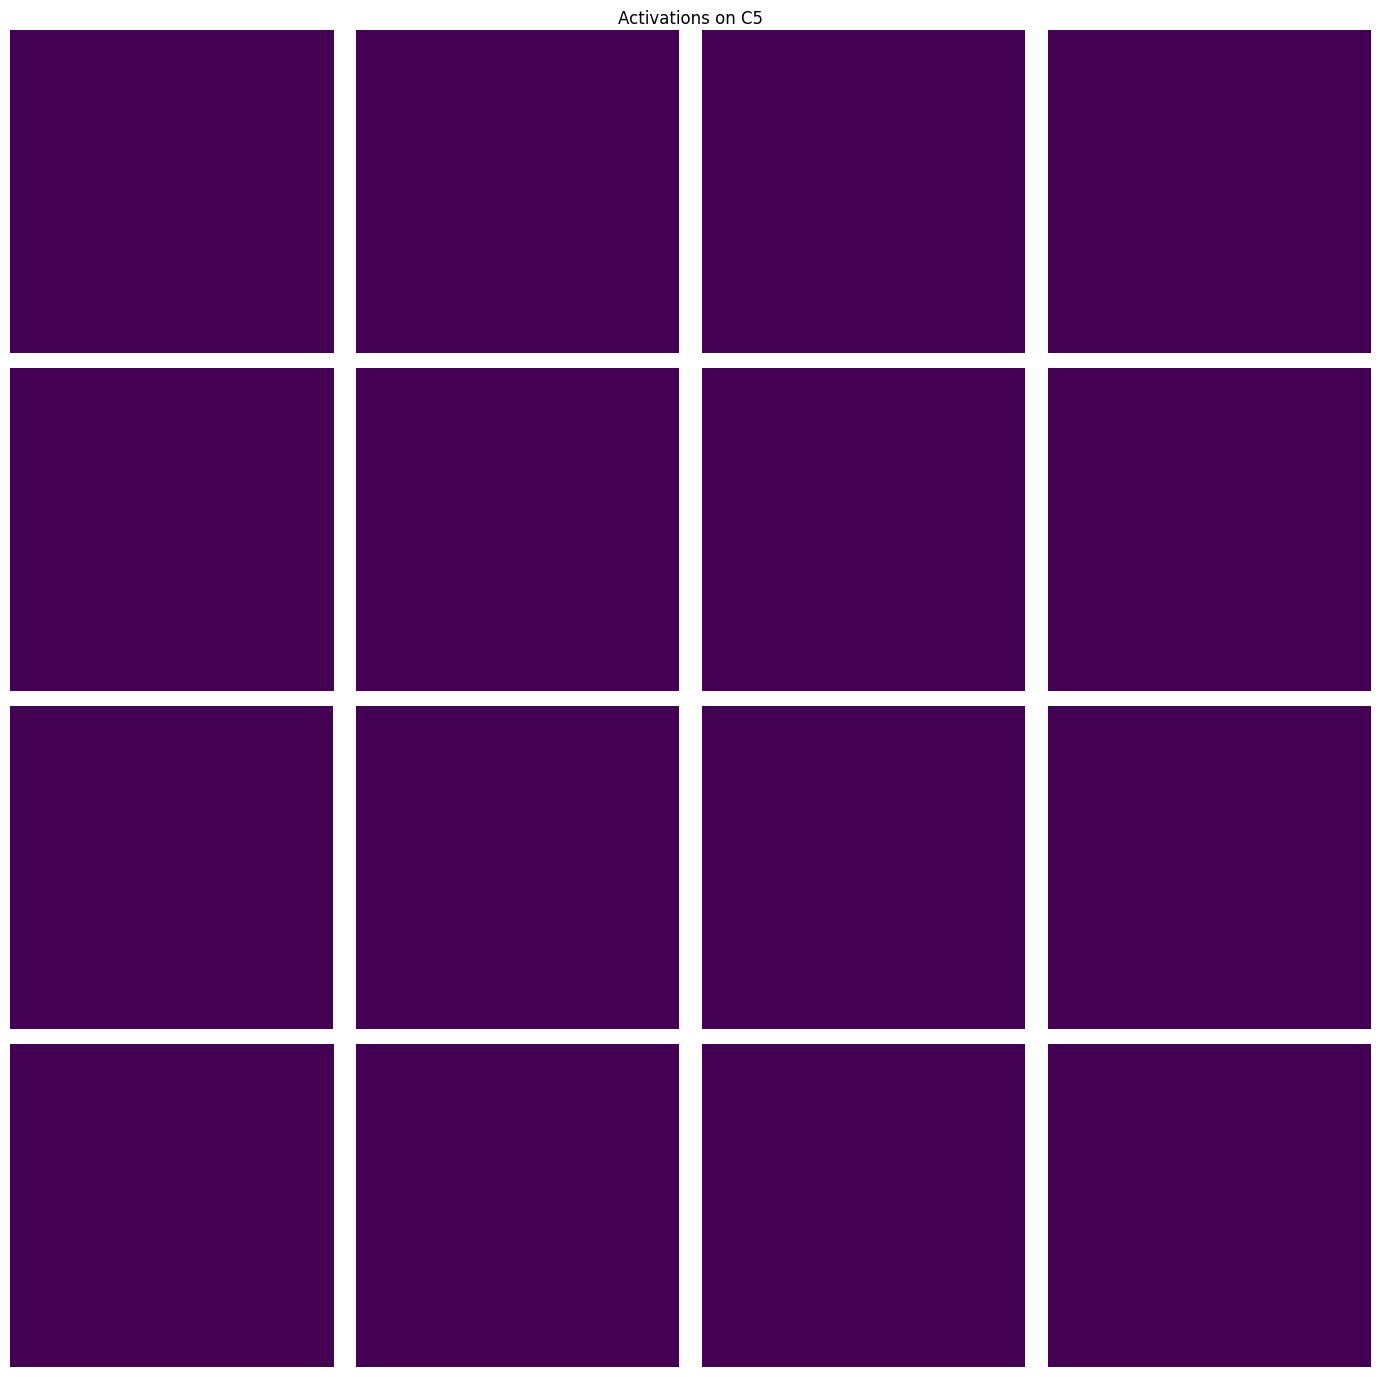

In [ ]:
layers=["C1","C3","C5"]
for layer in layers:
    visualization_layer(model,layer, img)

# First mod to LeNet

In [ ]:
def lenet_mod():
    inputs = Input(shape=(28, 28, 1))  # Adapted for MNIST, original used 32x32
    # C1: Convolutional layer
    x = Conv2D(6, kernel_size=5, activation="tanh", padding="same", name="C1")(inputs)
    # S2: Subsampling layer
    x = AveragePooling2D(pool_size=(2, 2), strides=2, name="S2")(x)
    # C3: Convolutional layer
    x = Conv2D(16, kernel_size=5, activation="tanh", name="C3")(x)
    # S4: Subsampling layer
    x = AveragePooling2D(pool_size=(2, 2), strides=2, name="S4")(x)
    # C5: Convolutional layer
    #x = Conv2D(120, kernel_size=5, activation="tanh", name="C5")(x)
    x = Flatten()(x)
    # F6: Fully connected layer
    x = Dense(84, activation="tanh", name="F6")(x)
    # Output layer
    outputs = Dense(10, activation="softmax", name="output")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model_mod=lenet_mod()
model_mod.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_mod.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (AveragePooling2D)           │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S4 (AveragePooling2D)           │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F6 (Dense)                      │ (None, 84)             │        33,684 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,106 (144.95 KB)

 Trainable params: 37,106 (144.95 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_mod=model_mod.fit(x_train,y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8414 - loss: 0.5658 - val_accuracy: 0.9648 - val_loss: 0.1320
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9587 - loss: 0.1411 - val_accuracy: 0.9767 - val_loss: 0.0788
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9754 - loss: 0.0816 - val_accuracy: 0.9792 - val_loss: 0.0718
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9827 - loss: 0.0606 - val_accuracy: 0.9832 - val_loss: 0.0569
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9867 - loss: 0.0455 - val_accuracy: 0.9843 - val_loss: 0.0515
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9852 - val_loss: 0.0506
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9901 - loss: 0.0328 - val_accuracy: 0.9875 - val_loss: 0.0434
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9928 - loss: 0.0245 - val_accuracy: 0.

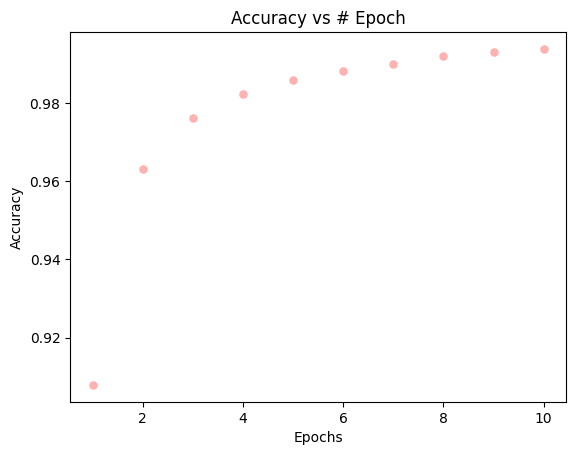

In [ ]:
epochs=np.arange(1,11,1)
plt.scatter(epochs,history_mod.history['accuracy'], c="r", marker="o", linewidth=0.1, alpha=0.3,label="1st modification")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs # Epoch")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


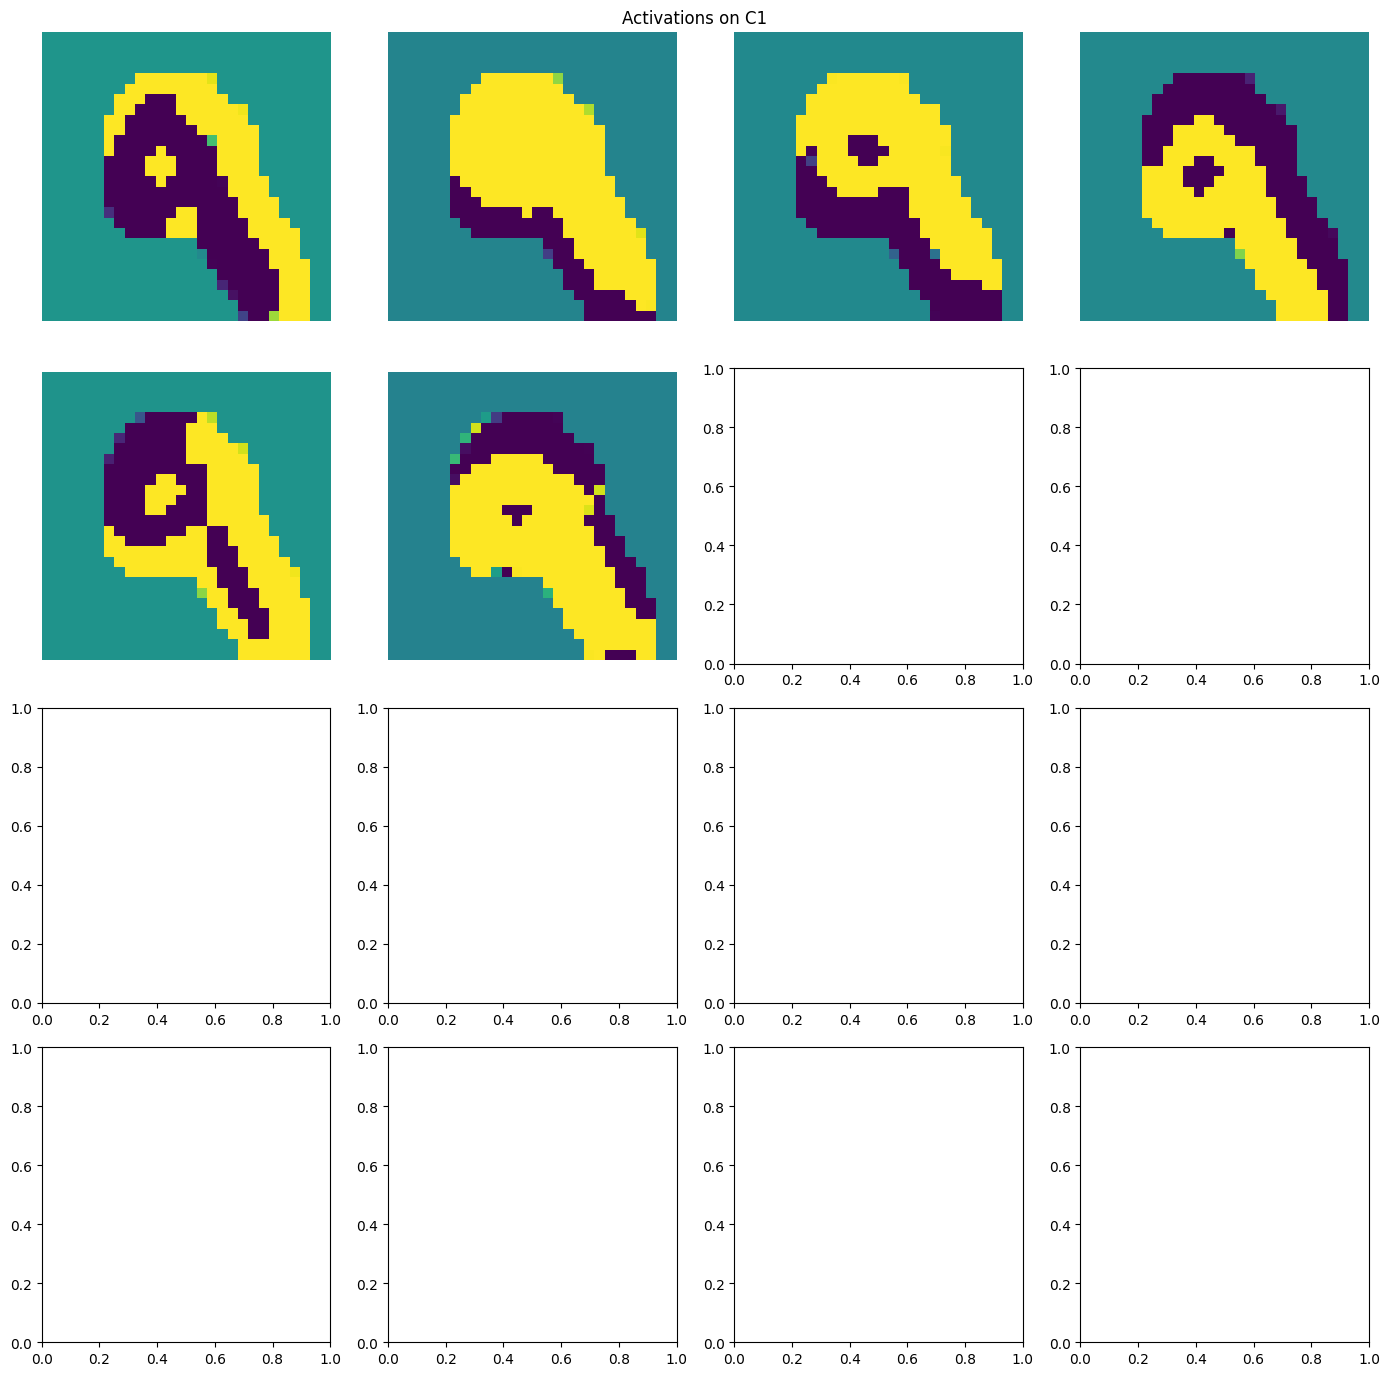

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


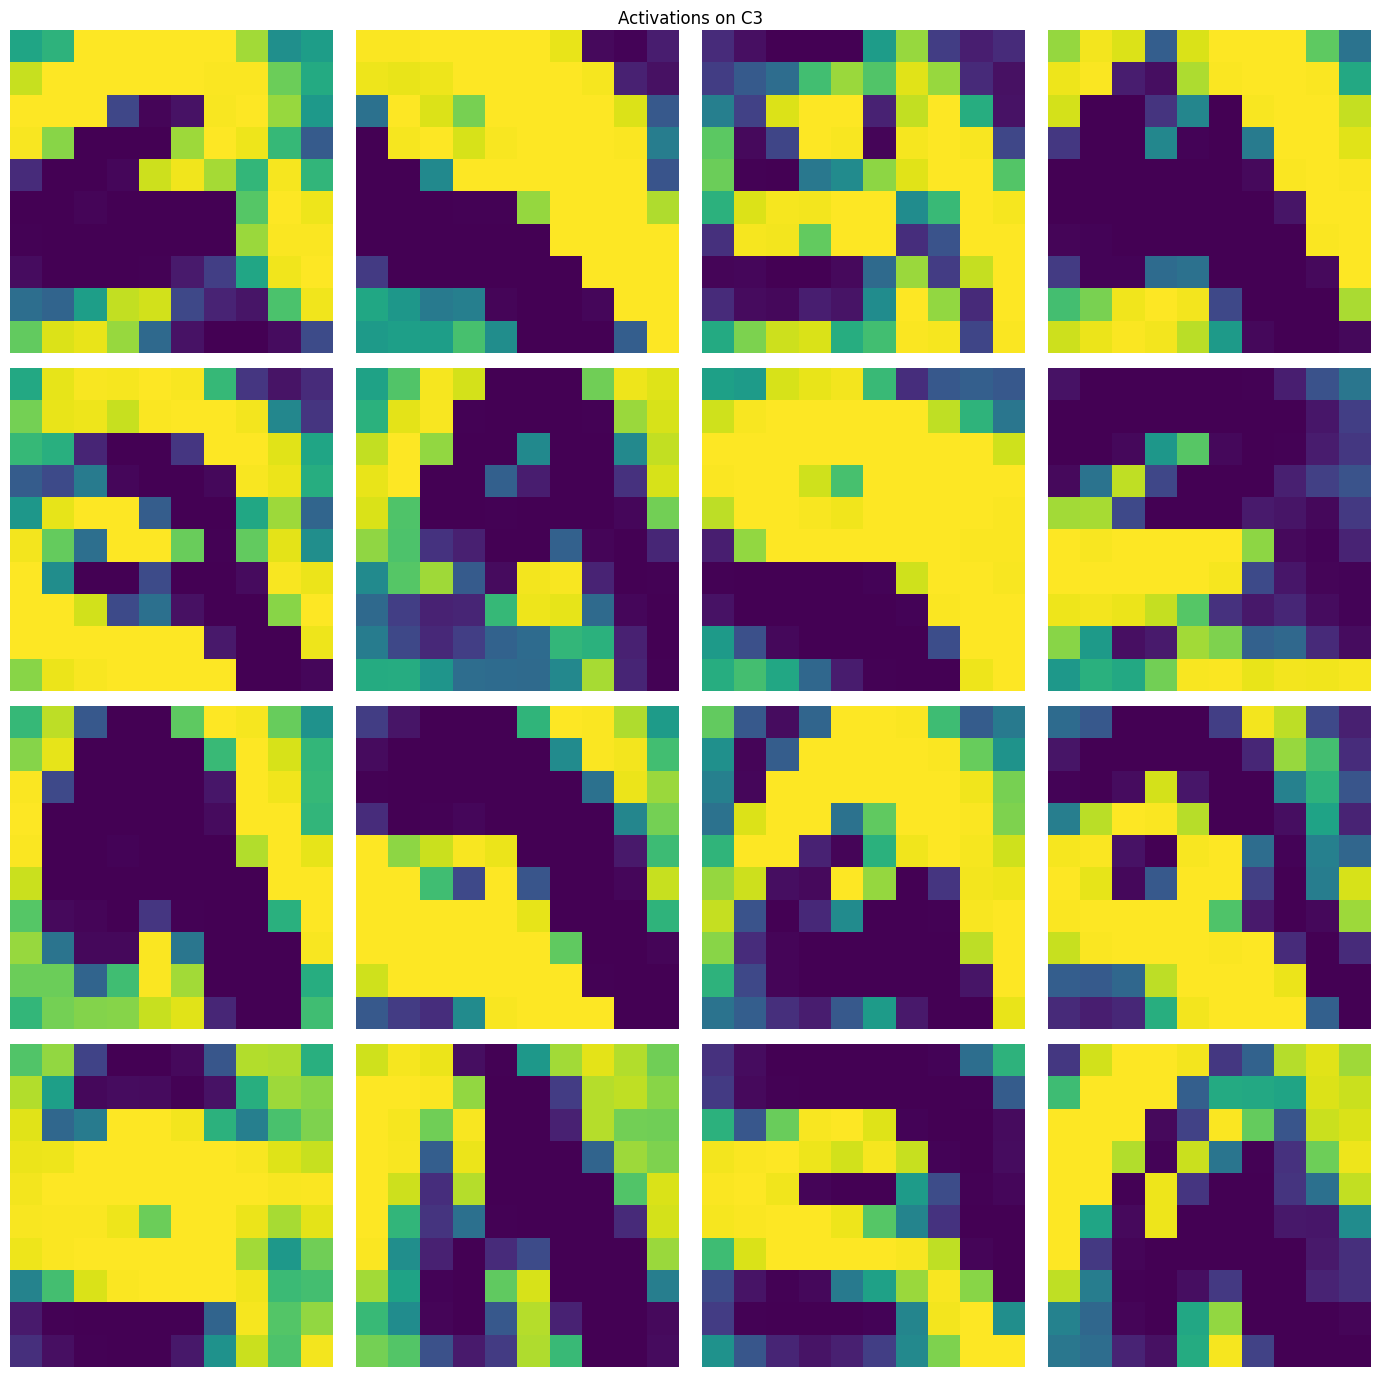

In [ ]:
layers=["C1","C3"]
for layer in layers:
    visualization_layer(model_mod,layer, img)

# Second modification to LeNet

In [ ]:
def lenet_modmod():
    inputs = Input(shape=(28, 28, 1))  # Adapted for MNIST, original used 32x32
    # C1: Convolutional layer
    x = Conv2D(6, kernel_size=5, activation="tanh", padding="same", name="C1")(inputs)
    # S2: Subsampling layer
    x = AveragePooling2D(pool_size=(2, 2), strides=2, name="S2")(x)
    # C3: Convolutional layer
    x = Conv2D(16, kernel_size=5, activation="tanh", name="C3")(x)
    # S4: Subsampling layer
    x = AveragePooling2D(pool_size=(2, 2), strides=2, name="S4")(x)
    x = Conv2D(10, kernel_size=5, activation="tanh", name="C5", padding="same")(x)
    # C5: Convolutional layer
    x = Conv2D(120, kernel_size=5, activation="tanh", name="C6")(x)#add
    x = Flatten()(x)
    # F6: Fully connected layer
    x = Dense(84, activation="tanh", name="F6")(x)
    # Output layer
    outputs = Dense(10, activation="softmax", name="output")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model_modmod=lenet_modmod()
model_modmod.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_modmod.summary()

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (AveragePooling2D)           │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S4 (AveragePooling2D)           │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5 (Conv2D)                     │ (None, 5, 5, 10)       │         4,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C6 (Conv2D)                     │ (None, 1, 1, 120)      │        30,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ F6 (Dense)                      │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,716 (186.39 KB)

 Trainable params: 47,716 (186.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_modmod=model.fit(x_train,y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.9882 - val_loss: 0.0445
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9964 - loss: 0.0129 - val_accuracy: 0.9868 - val_loss: 0.0470
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9971 - loss: 0.0109 - val_accuracy: 0.9880 - val_loss: 0.0449
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9978 - loss: 0.0095 - val_accuracy: 0.9892 - val_loss: 0.0433
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9980 - loss: 0.0073 - val_accuracy: 0.9898 - val_loss: 0.0416
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9893 - val_loss: 0.0446
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9985 - loss: 0.0065 - val_accuracy: 0.9892 - val_loss: 0.0456
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.

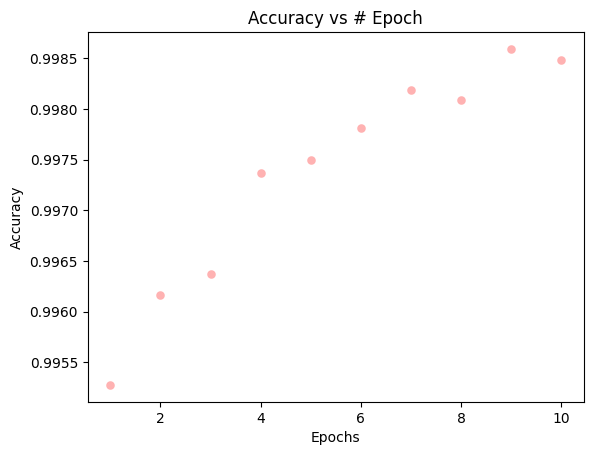

In [ ]:
epochs=np.arange(1,11,1)
plt.scatter(epochs,history_modmod.history['accuracy'], c="r", marker="o", linewidth=0.1, alpha=0.3,label="2nd modification")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs # Epoch")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


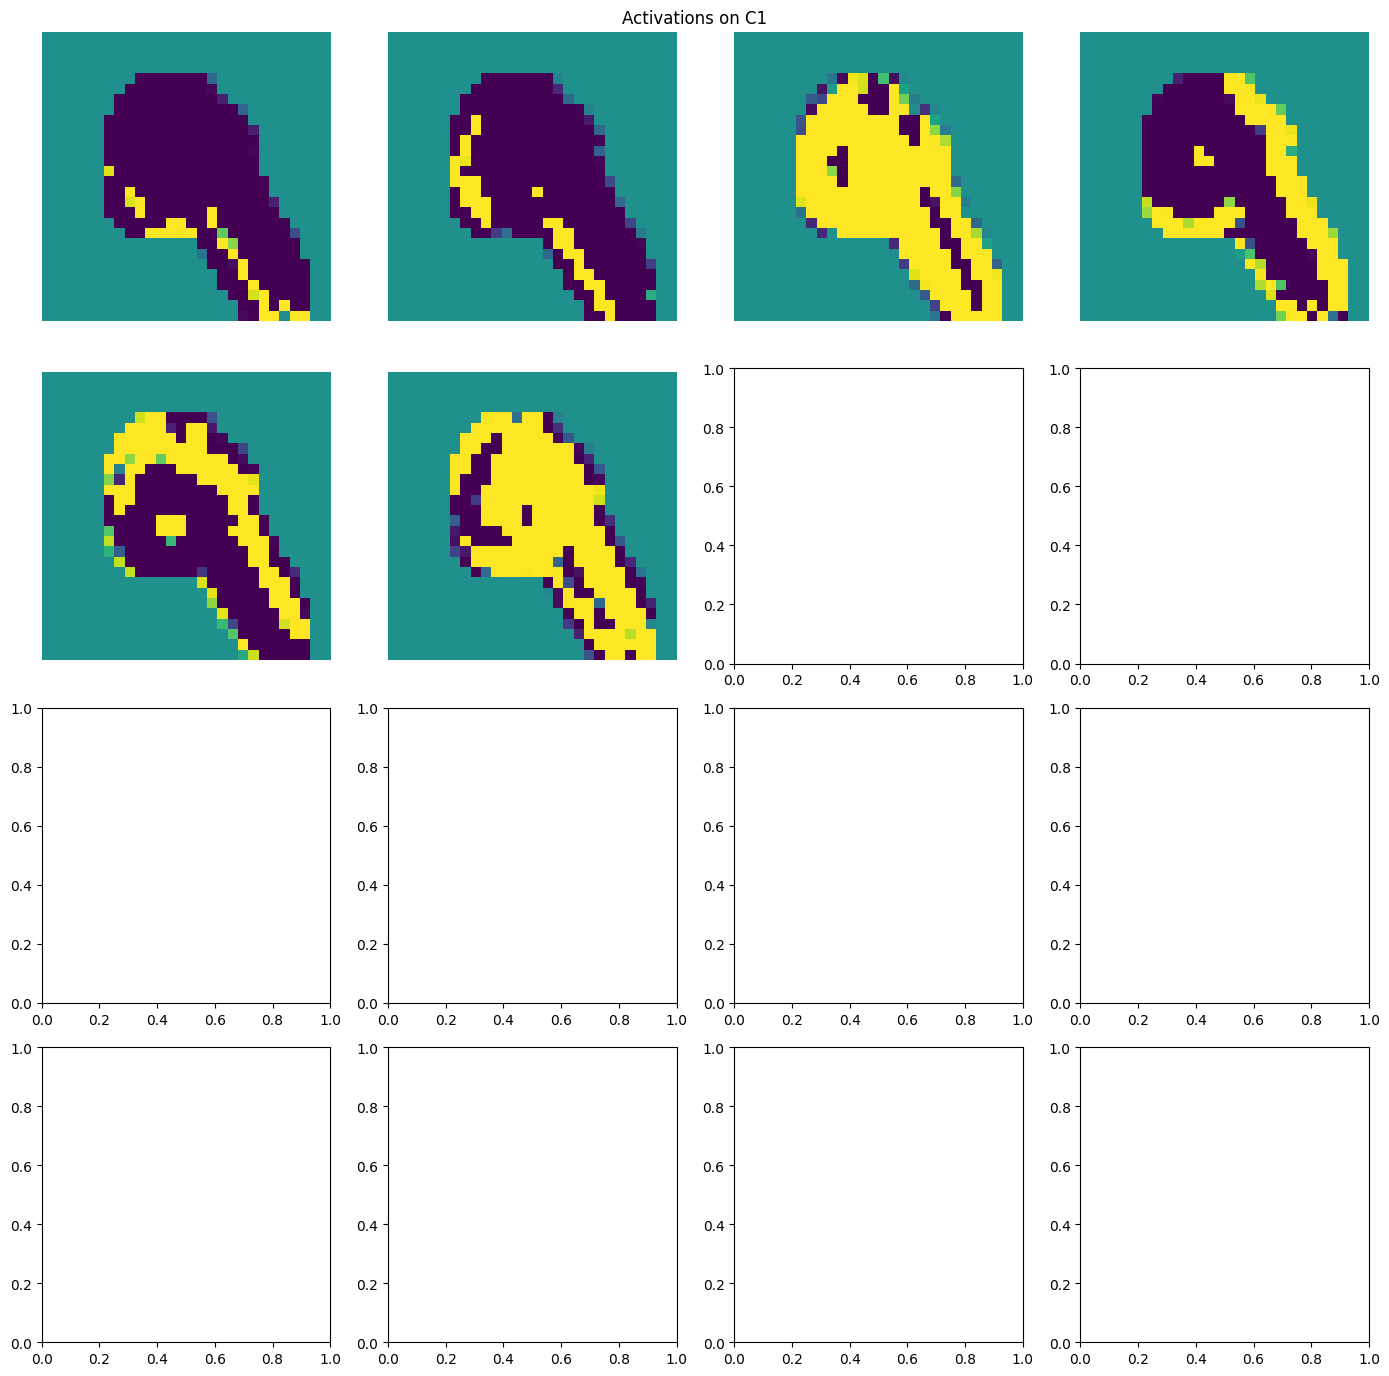

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


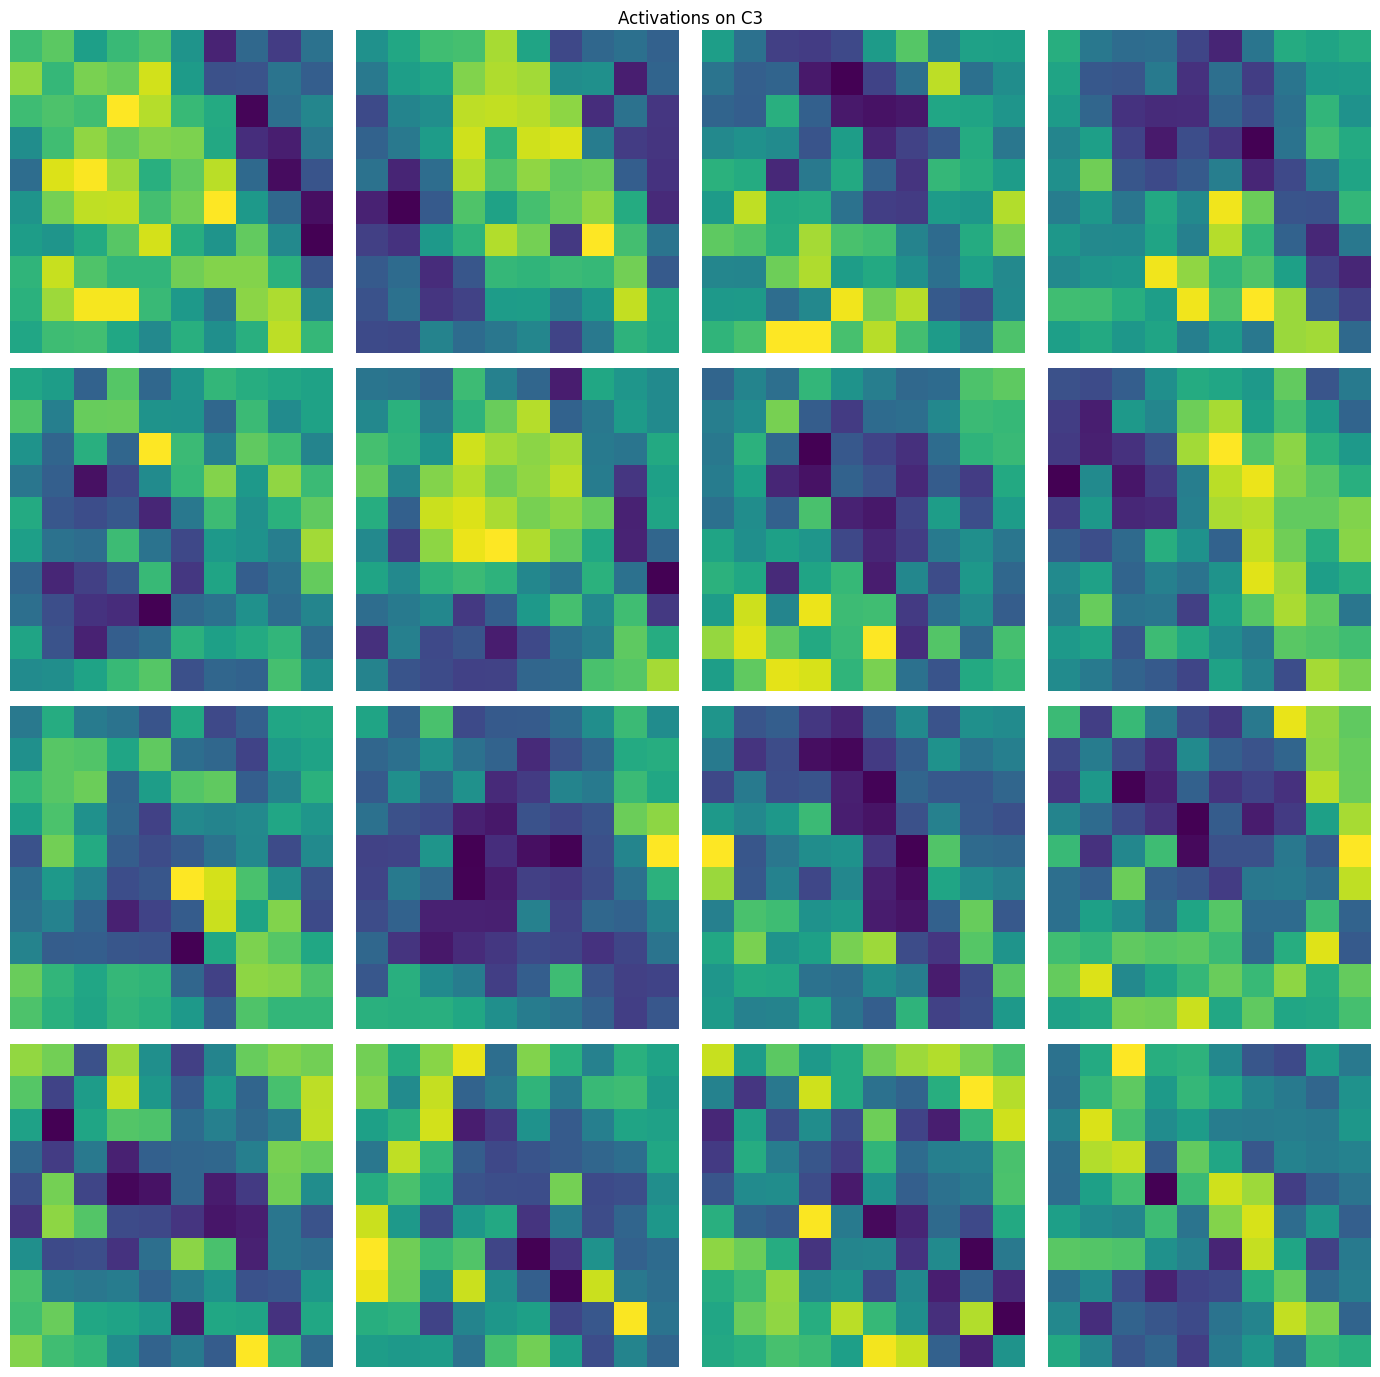

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


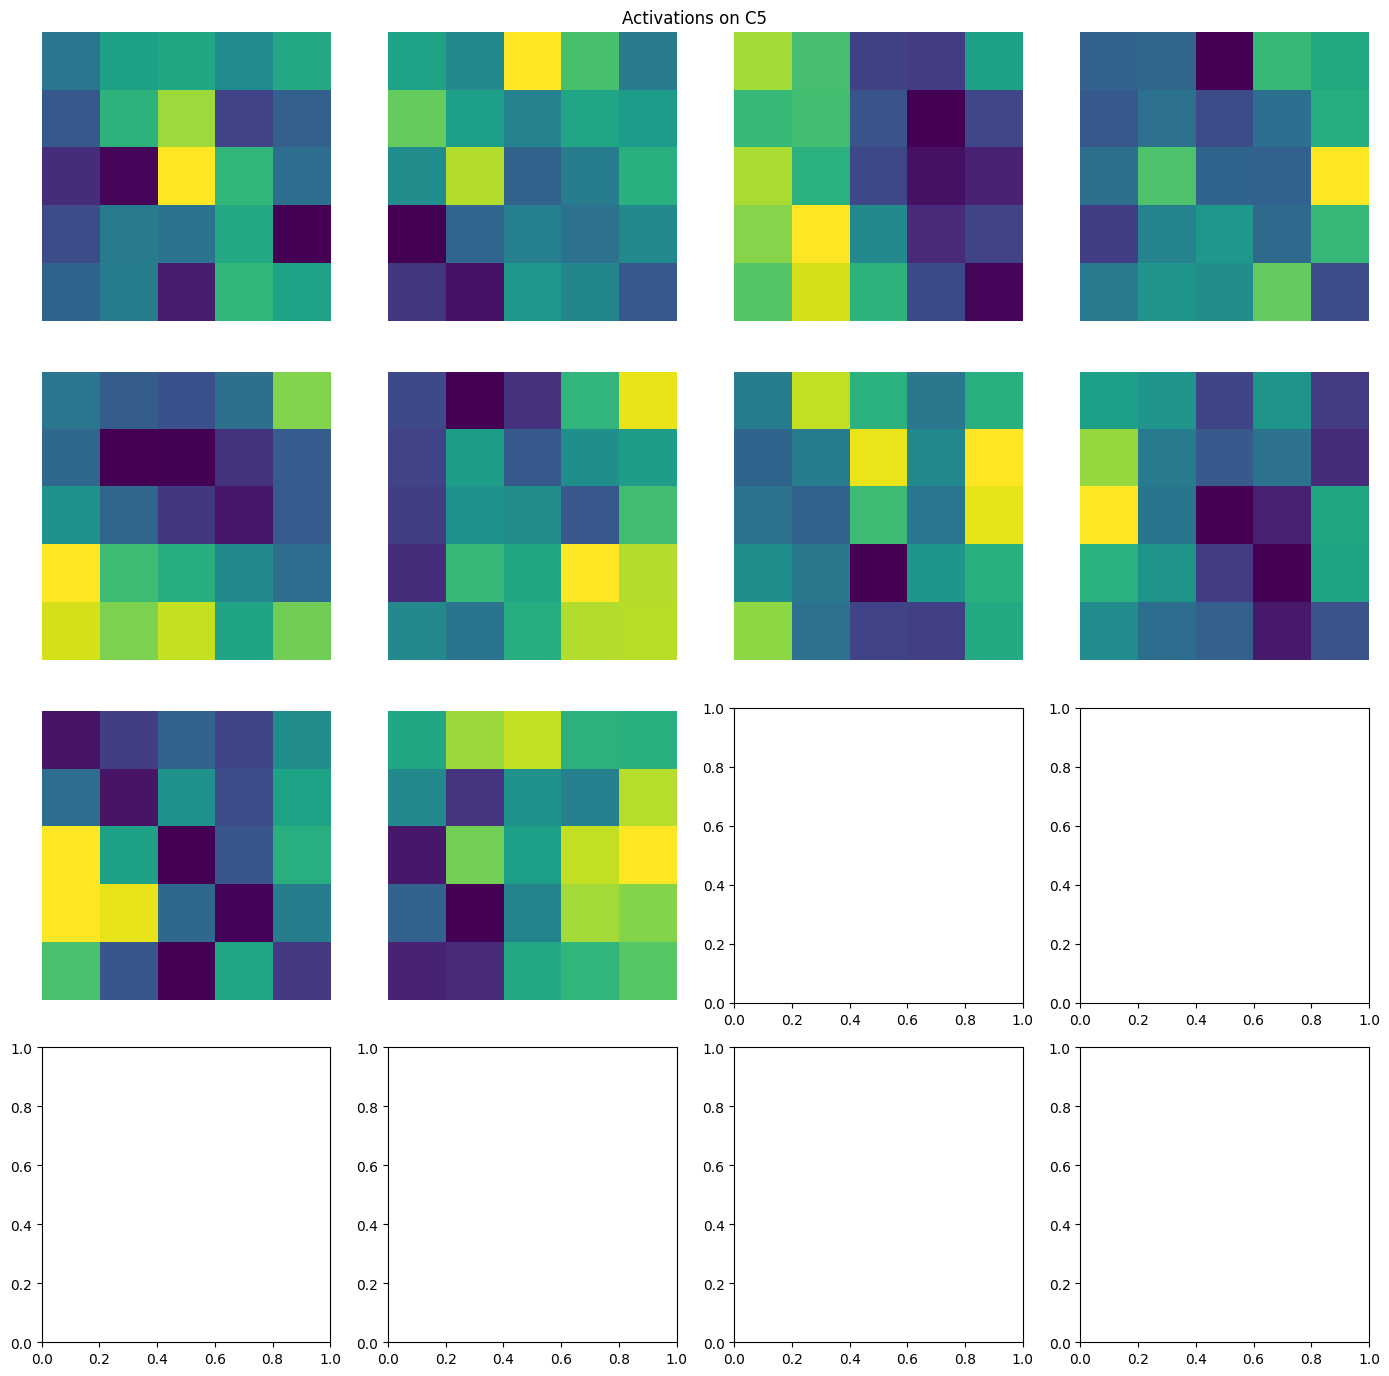

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


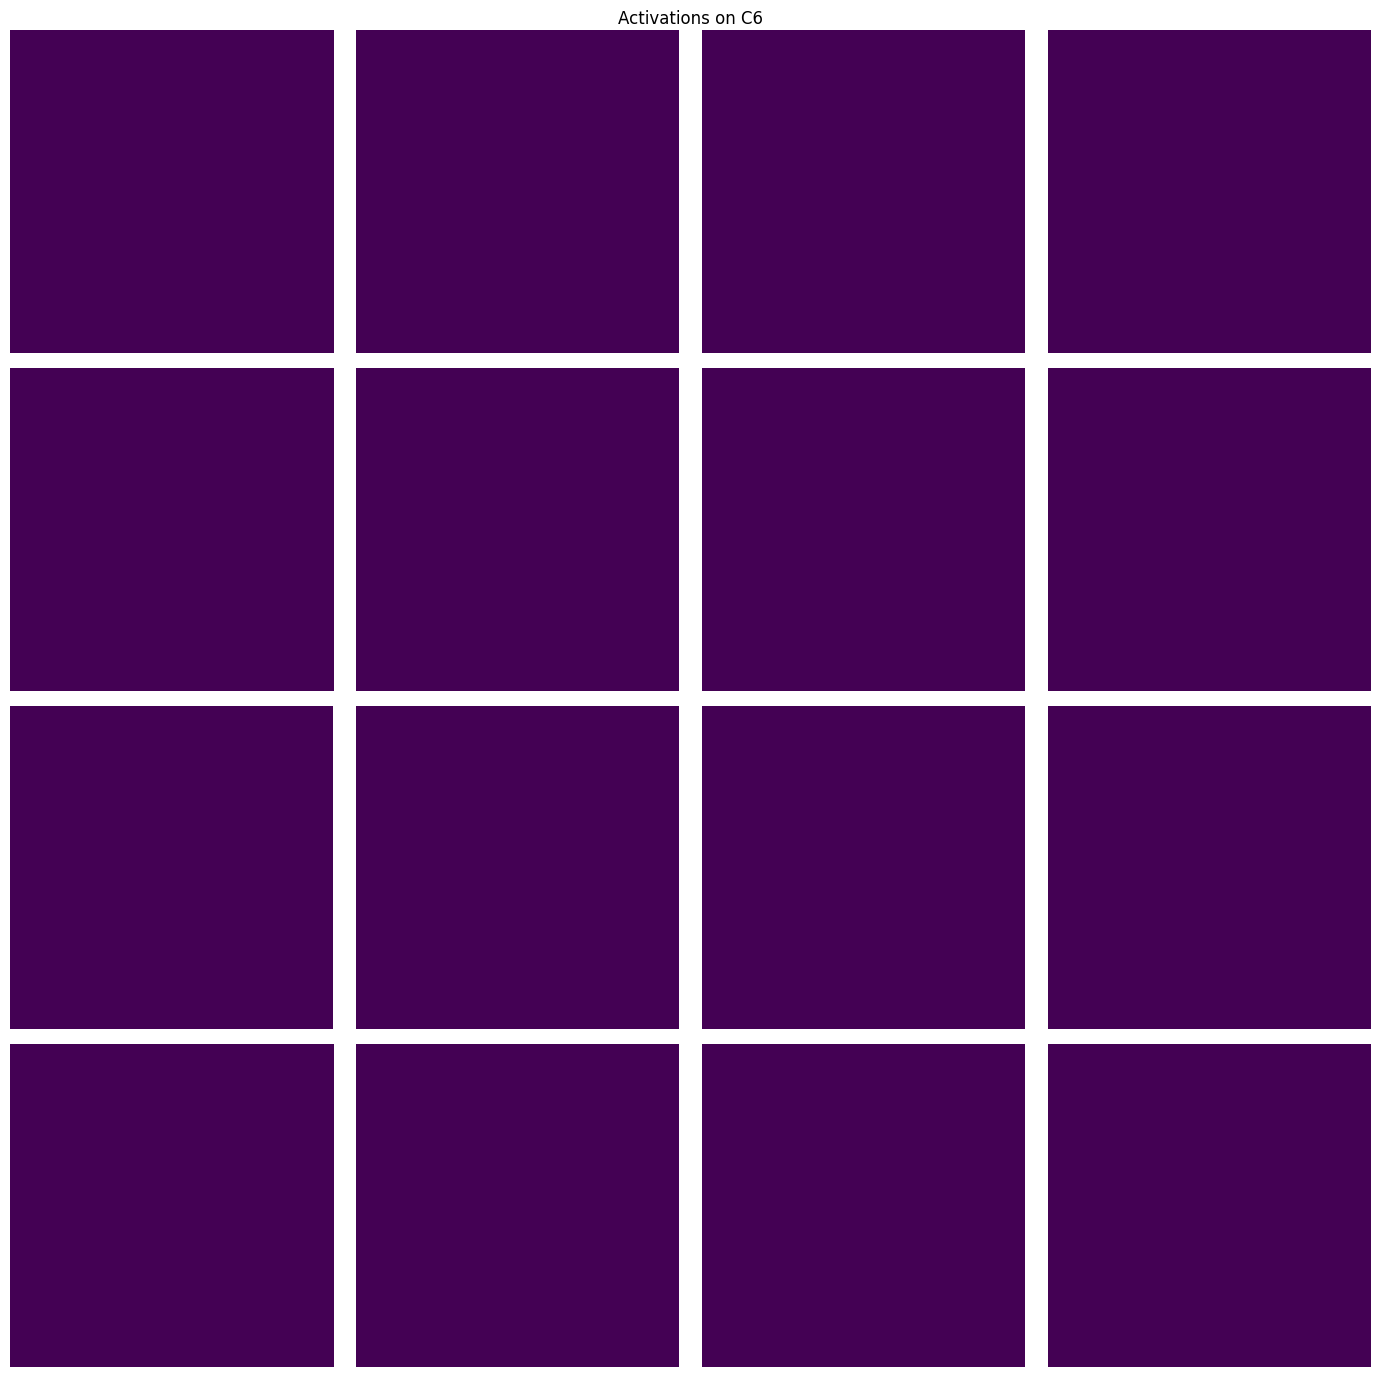

In [ ]:
layers=["C1","C3","C5","C6"]
for layer in layers:
    visualization_layer(model_modmod,layer, img)

# Accuracy comparison

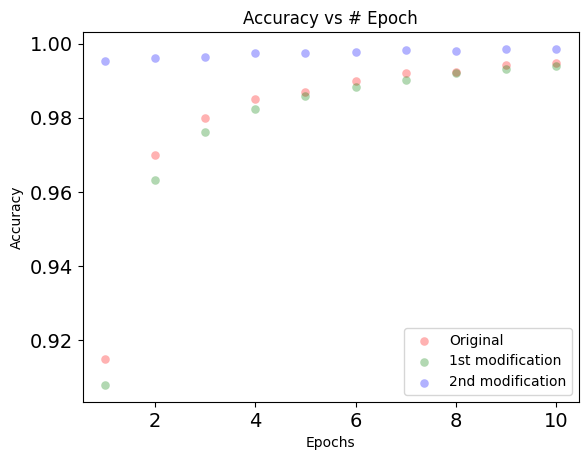

In [ ]:
epochs=np.arange(1,11,1)
plt.scatter(epochs,history.history['accuracy'], c="r", marker="o", linewidth=0.1, alpha=0.3,label="Original")
plt.scatter(epochs,history_mod.history['accuracy'], c="g", marker="o", linewidth=0.1, alpha=0.3,label="1st modification")
plt.scatter(epochs,history_modmod.history['accuracy'], c="b", marker="o", linewidth=0.1, alpha=0.3,label="2nd modification")
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs # Epoch")
plt.show()

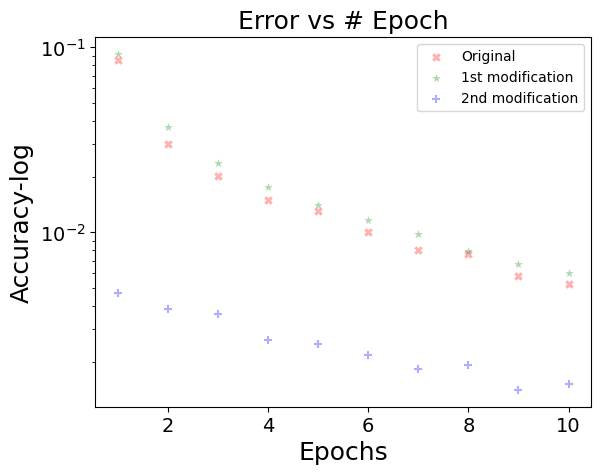

In [ ]:
epochs=np.arange(1,11,1)
plt.scatter(epochs,1-np.asarray(history.history['accuracy']), c="r", marker="X", linewidth=0.1, alpha=0.3,label="Original")
plt.scatter(epochs,1-np.asarray(history_mod.history['accuracy']), c="g", marker="*", linewidth=0.1, alpha=0.3,label="1st modification")
plt.scatter(epochs,1-np.asarray(history_modmod.history['accuracy']), c="b", marker="P", linewidth=0.1, alpha=0.3,label="2nd modification")
plt.legend()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Epochs", fontsize=18)
plt.ylabel("Accuracy-log", fontsize=18)
plt.title("Error vs # Epoch", fontsize=18)
plt.yscale("log")
plt.show()

In [ ]:
trainable_count = int(np.sum([tf.keras.backend.count_params(p) for p in model.trainable_weights]))
non_trainable_count = int(np.sum([tf.keras.backend.count_params(p) for p in model.non_trainable_weights]))

print('Trainable params: {:,}'.format(trainable_count))
print('Non-trainable params: {:,}'.format(non_trainable_count))
print('Total params: {:,}'.format(trainable_count + non_trainable_count))

Trainable params: 61,706
Non-trainable params: 0
Total params: 61,706


In [ ]:
def tparams(model):
    return int(np.sum([tf.keras.backend.count_params(p) for p in model.trainable_weights]))

In [ ]:
params=np.asarray([tparams(m) for m in [model,model_mod,model_modmod]])

In [ ]:
acc=np.asarray([x.history["accuracy"][-1] for x in [history, history_mod,history_modmod]])

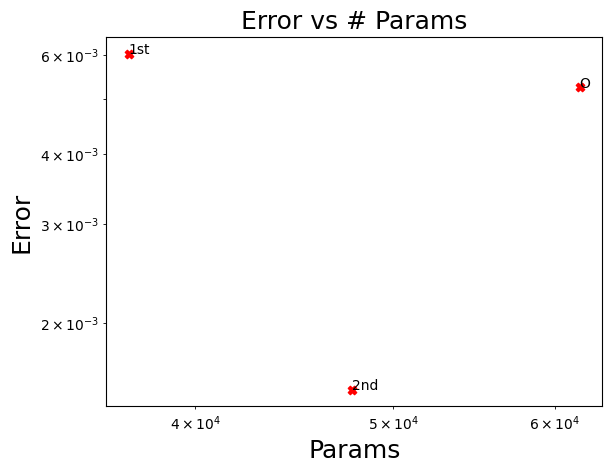

In [ ]:
labels=["O","1st","2nd"]
plt.scatter(params,1-acc,c="r", marker="X")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in range(len(params)):
    plt.text(params[i], (1-acc)[i], labels[i])
plt.xlabel("Params", fontsize=18)
plt.ylabel("Error", fontsize=18)
plt.title("Error vs # Params", fontsize=18)
plt.yscale("log")
plt.xscale("log")
plt.show()